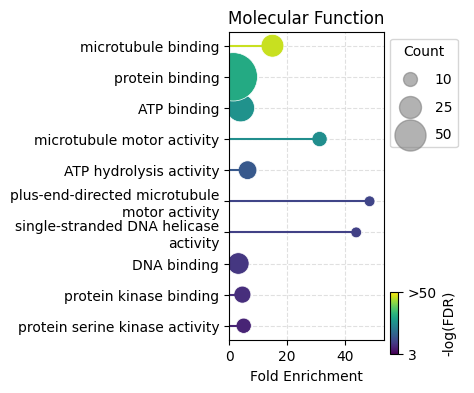

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import textwrap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Load DataFrame
file_name = "GO_MF"
titles = {"GO_BP": "Biological Process", "GO_CC": "Cellular Component", "GO_MF": "Molecular Function"}
# titles = {"pathways_kegg": "KEGG", "pathways_reactome": "RACTOME", "pathways_wiki": "WIKIPATHWAYS"}
df = pd.read_csv(f"results_final/gene/DAVID/{file_name}.txt", sep="\t")

# Extract the first 10 rows
df = df.head(10)
df['-log(FDR)'] = -np.log(df['FDR'])

# Rename the terms to keep only the part after "~"
df['Term'] = df['Term'].apply(lambda x: x.split('~')[1]) # ':' for wiki and kegg, '~' for reactome

# Function to wrap text
def wrap_text(text, width=30):
    return "\n".join(textwrap.wrap(text, width))

# Apply the wrap_text function to the 'Term' column
df['Term'] = df['Term'].apply(wrap_text)

# Swap the order of rows (top to bottom)
df = df[::-1].reset_index(drop=True)

# Plotting main figure
fig, ax = plt.subplots(figsize=(2, 4))

# Normalize FDR for colormap
norm = plt.Normalize(vmin=3, vmax=50)
colors = plt.cm.viridis(norm(df['-log(FDR)']))

# Create scatter plot
scatter = ax.scatter(
    x=df['Fold Enrichment'],
    y=df['Term'],
    s=df['Count']*10,  # Adjust the size scaling factor as needed
    c=colors,
    edgecolors="w",
    linewidth=0.5
)

# Add horizontal lines for lollipop plot
for i in range(len(df)):
    ax.hlines(y=df['Term'][i], xmin=0, xmax=df['Fold Enrichment'][i], color=colors[i])

# Set labels
ax.set_xlabel('Fold Enrichment')

# Show grid behind the dots
ax.grid(True, color='lightgray', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)
ax.set_xlim([0, df['Fold Enrichment'].max()+5])
ax.set_title(titles[file_name])
# Ensure first row is shown on top tick and last row on bottom tick
ax.set_yticks(range(len(df)))
ax.set_yticklabels(df['Term'])

ax_cbar = inset_axes(ax,
                    width="5%",  
                    height="20%",
                    loc='lower right',
                    borderpad=-1
                   )
# Add the colorbar to the new axis
cbar = fig.colorbar(scatter, cax=ax_cbar)
cbar.set_label('-log(FDR)')

# Set the colorbar labels manually
cbar.set_ticks([0, 1])
cbar.set_ticklabels(["3", ">50"])


# Add legend for dot sizes
ax_legend = ax.inset_axes([0.52,0,1,1])
# Create a list of sizes that will be shown in the legend
sizes = [100, 250, 500] # list(df['Count']*10)
# Create a list of labels to correspond to the sizes
labels = [str(count//10) for count in sizes]
# Create a scatter plot for each size in the list
for size, label in zip(sizes, labels):
    ax_legend.scatter([], [], c='gray', alpha=0.6, s=size, label=label)
# Add a legend to the plot
ax_legend.legend(scatterpoints=1, frameon=True, labelspacing=1, title='Count')

# Hide the x and y axis of the legend plot
ax_legend.axis('off')

fig.savefig(f"results_final/gene/DAVID/{file_name}.png", dpi=600, bbox_inches = 'tight', pad_inches = 0.01)
fig.savefig(f"results_final/gene/DAVID/{file_name}.pdf", dpi=600, bbox_inches = 'tight', pad_inches = 0.01)


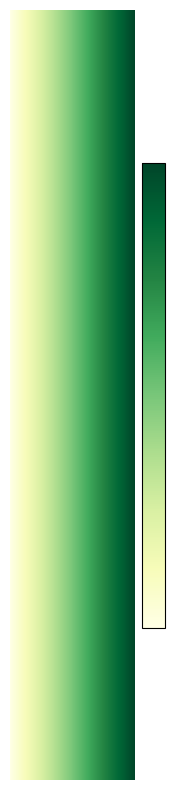

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

def generate_colorbar(colormap='viridis', width=2, height=10):
    fig, ax = plt.subplots(figsize=(width, height))

    gradient = np.linspace(0, 1, 256)
    gradient = np.vstack((gradient, gradient))

    ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(colormap))
    ax.set_axis_off()

    # Create colorbar
    cbar = plt.colorbar(ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(colormap)), ax=ax, orientation='vertical')
    cbar.ax.set_yticklabels([])  # remove the tick labels
    cbar.ax.set_yticks([])  


# Call the function
generate_colorbar('YlGn', 2, 10)